In [1]:
import os
import numpy as np
from save_model_metadata import save_model_metadata
from load_annotation_data import load_annotation_data
from create_training_tiles import create_training_tiles
from train_segmentation_model import train_segmentation_model
from classify_images import classify_images
from test_segmentation_model import test_segmentation_model


In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_08_23_2024'

WS = [[0, 0, 0, 0, 2, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [6, 4, 2, 3, 5, 1,7], []]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...
Plotting cmap took 0.0 minutes and 0.01745748519897461 seconds
Saving metadata took 0.0 minutes and 0.09244632720947266 seconds


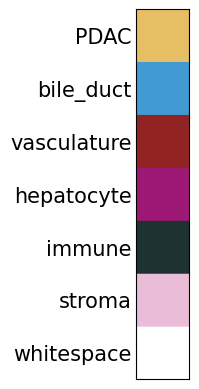

In [3]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [4]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 6: Liv-17_0001
Checking parameters took 0.0 minutes and 0.1310901641845703 seconds
 annotation data previously loaded
Image 2 of 6: Liv-17_0041
Checking parameters took 0.0 minutes and 0.09302520751953125 seconds
 annotation data previously loaded
Image 3 of 6: Liv-17_0081
Checking parameters took 0.0 minutes and 0.10546135902404785 seconds
 annotation data previously loaded
Image 4 of 6: Liv-17_0121
Checking parameters took 0.0 minutes and 0.1377561092376709 seconds
 annotation data previously loaded
Image 5 of 6: Liv-17_0161
Checking parameters took 0.0 minutes and 0.08908796310424805 seconds
 annotation data previously loaded
Image 6 of 6: Liv-17_0199
Checking parameters took 0.0 minutes and 0.11506104469299316 seconds
 annotation data previously loaded


In [5]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 544424200.0 pixels of PDAC, 41% of the most common class.
 There are 32034500.0 pixels of bile duct, 2% of the most common class.
 There are 92471600.0 pixels of vasculature, 7% of the most common class.
 There are 1312608300.0 pixels of hepatocyte. This is the most common class.
 There are 33182000.0 pixels of immune, 2% of the most common class.
 There are 655049200.0 pixels of stroma, 49% of the most common class.
 There are 817792400.0 pixels of whitespace, 62% of the most common class.

Building training tiles...
Starting time for the while loop
Saving big tiles
  1 of 15 training images completed in 3 minutes
  Used 144.9% counts and 40.8% unique annotations of PDAC
  Used 575.4% counts and 100.0% unique annotations of bile duct
  Used 440.3% counts and 84.7% unique annotations of vasculature
  Used 274.8% counts and 45.0% unique annotations of hepatocyte
  Used 644.7% counts and 100.0% unique annotations o

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 182s 321ms/step - loss: 0.2836 - accuracy: 0.8984 - val_loss: 0.2102 - val_accuracy: 0.9222
Epoch 2/8
500/500 [==============================] - 153s 305ms/step - loss: 0.1606 - accuracy: 0.9397 - val_loss: 0.1373 - val_accuracy: 0.9481
Epoch 3/8
500/500 [==============================] - 152s 303ms/step - loss: 0.1111 - accuracy: 0.9572 - val_loss: 0.1064 - val_accuracy: 0.9591
Epoch 4/8
500/500 [==============================] - 152s 302ms/step - loss: 0.0874 - accuracy: 0.9660 - val_loss: 0.0971 - val_accuracy: 0.9626
Epoch 5/8
500/500 [==============================] - 156s 310ms/step - loss: 0.0743 - accuracy: 0.9709 - val_loss: 0.0914 - val_accuracy: 0.9653
Epoch 6/8
500/500 [==============================] - 151s 301ms/step - loss: 0.0664 - accuracy: 0.9738 - val_loss: 0.0906 - val_accuracy: 0.9662
Epoch 7/8

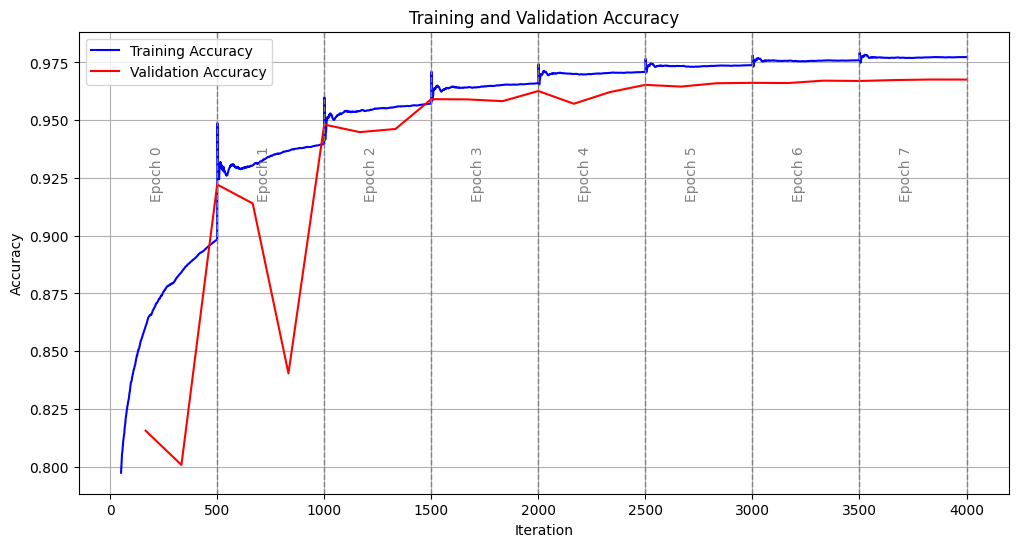

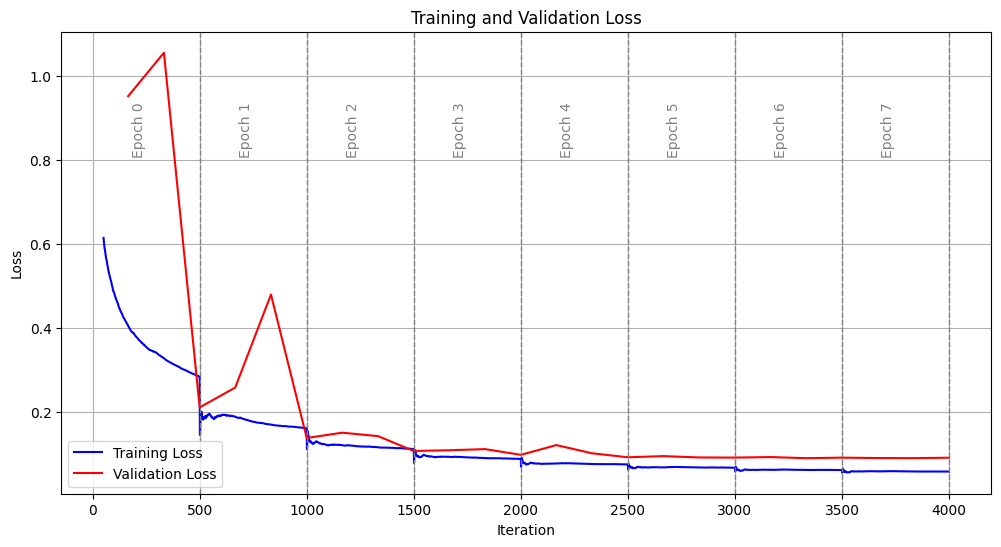

In [5]:
train_segmentation_model(pthDL)

Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: Liv-17_0101
Checking parameters took 0.0 minutes and 0.08044958114624023 seconds
 annotation data previously loaded
   
  Starting classification of image 1 of 1: Liv-17_0101.tif
1/1 [==============================] - 0s 19ms/step
Image 1 of 1 took 154 s
  Total time for classification: 0.0h 3.0m 44.37398838996887s


MemoryError: Unable to allocate 7.46 GiB for an array with shape (22243, 30010, 3) and data type float32

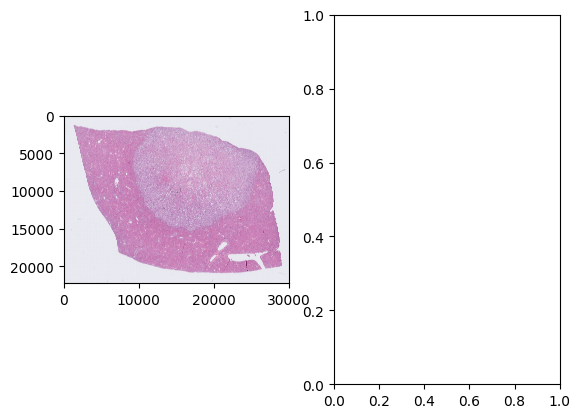

In [6]:
test_segmentation_model(pthDL, pthtest, pthtestim)

In [7]:
classify_images(pthim,pthDL, color_overlay_HE=True)

   
  Starting classification of image 1 of 6: Liv-17_0001.tif


MemoryError: 

In [ ]:
# from make_overlay import make_overlay
# from tifffile import imread 
# import numpy as np
# from PIL import Image
# 
# imclassify = Image.open(r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\10x\classification_CODA_python_08_19_2024\Liv-17_0001.tif')
# imclassify = np.array(imclassify)
# img_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\10x\Liv-17_0001.png'
# imclassify = imclassify-1
# save_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\10x\classification_CODA_python_08_19_2024\check_classification'
# _ = make_overlay(img_path, imclassify, colormap=cmap, save_path=save_path)